In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

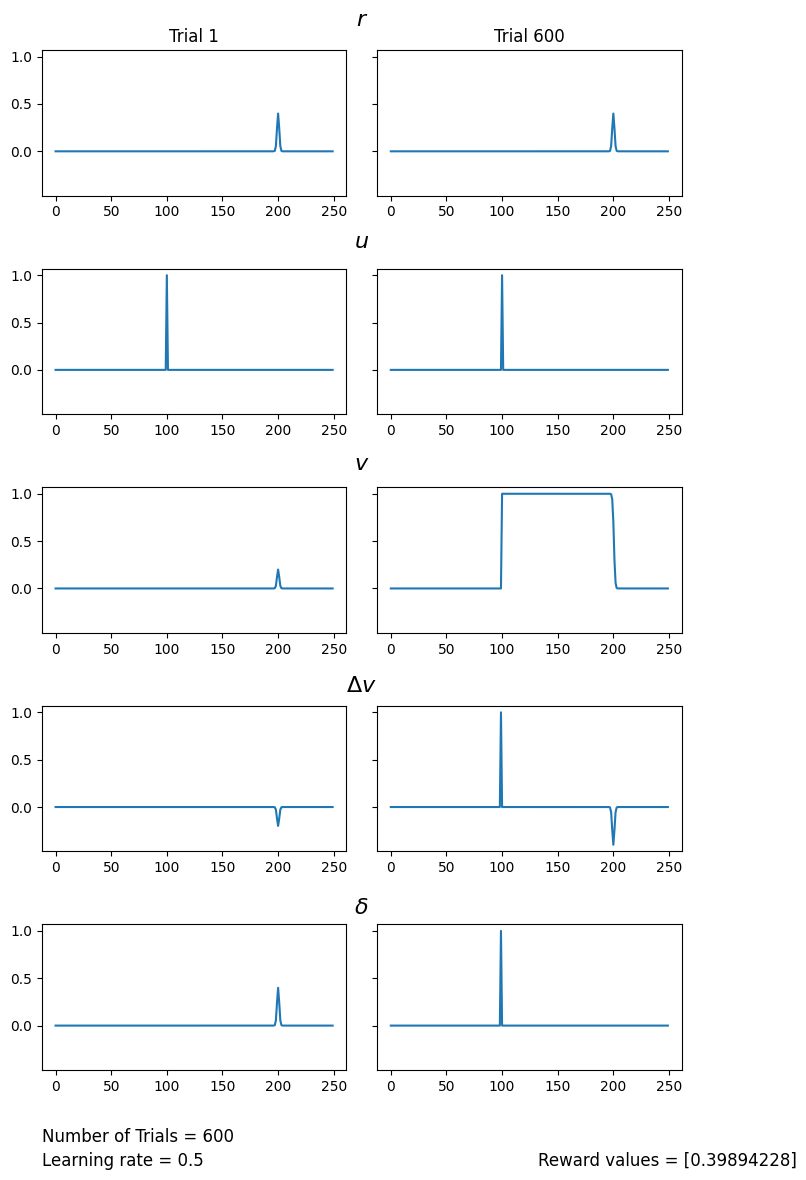

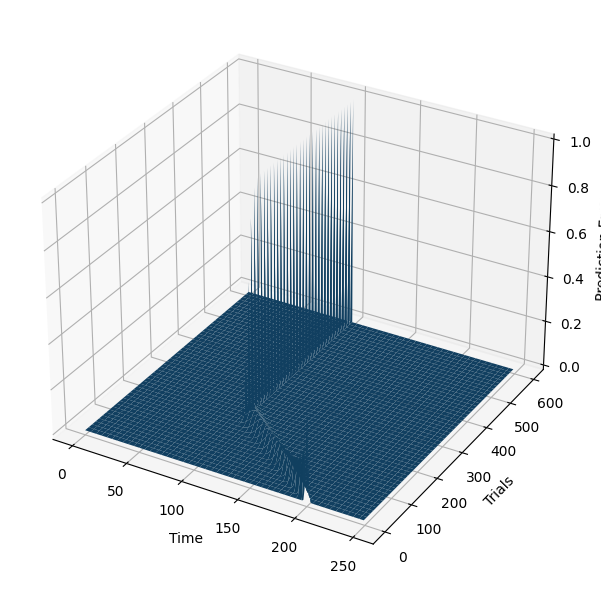

In [3]:
time_line = 250
event_time = 100
reward_time = [200]

learning_rate = 0.5
trials = 600


def sim_learning(trials, time_line, learning_rate, event_time, reward_time):

    """
    Arguments: 
    trials: number of trials in the training, int
    time_line: timepoints in each trial, int
    learning_rate: stepsize to update weights
    event_time: timepoint of stimulus
    reward_time: timepoint of reward

    
    Returns:
    delta: updated prediction errors
    r: reward
    u: stimulus
    v: predicted_rewards
    d_v: difference in prediction between timesteps
    """
    w = np.zeros(time_line) #Initialize weights
    delta = np.zeros((trials, time_line)) # Initialize prediction errors for all times and trials
    v = np.zeros(time_line) #Initialize predicted_rewards
    u = np.zeros(time_line) #Initialize stimulus
    r = np.zeros(time_line) #Initialize rewards
    d_v= np.zeros(time_line)  #Initialize prediction delta vector



    u[event_time] = 1


    
    # for reward in reward_time:
        # r[reward] = 1

    for reward in reward_time:
        # Create a Gaussian distribution
        mean = reward
        std_dev = 1.0  # You can adjust the standard deviation as needed

        # Generate a range of x values
        x_values = np.linspace(0, time_line-1, time_line)

        # Evaluate the Gaussian distribution at each x value
        gaussian_distribution = stats.norm.pdf(x_values, mean, std_dev)

        # Normalize the Gaussian distribution to sum to 1
        gaussian_distribution /= np.sum(gaussian_distribution)

        # Accumulate the scaled Gaussian distribution into r
        r += gaussian_distribution


    for trial in range(trials):
        for t in range(time_line-1):

            #Calculate prdiction error
            delta[trial, t] = r[t] + v[t+1] - v[t] 

            if delta[trial, t] != 0 :

                for tau in range(t+1):
                    
                    #Update weights
                    w[tau] = w[tau] + learning_rate*delta[trial, t]*u[t-tau]

            #Update predictions (v(t) =  t∑τ=0  w(τ)u(t − τ) )
            v[t] = np.convolve(w, u)[t]
            v[t+1] = np.convolve(w, u)[t+1]
            d_v[t] = v[t + 1] - v[t]

    return [delta, r, u, v, d_v]



def plot(trials):
    
    a1 = [1]
    a2 = [trials]

    fig, axs = plt.subplots(5, 2, figsize=(8, 12), sharex=False, sharey=True)
    time_axis = np.arange(0, time_line, 1)

    for a, i in zip([a1, a2], [0, 1]):
        for N in a:
            Results = sim_learning(N, time_line, learning_rate, event_time, reward_time)
            Error = Results[0]

            axs[0, i].plot(time_axis, Results[1])
            axs[1, i].plot(time_axis, Results[2])
            axs[2, i].plot(time_axis, Results[3])
            axs[3, i].plot(time_axis, Results[4])
            axs[4, i].plot(time_axis, Error[N-1, :])

    Titles = ["$r$", "$u$", "$v$", "$\Delta v$", "$\delta$"]

    for i in range(0, 5):
        fig.text(0.5, 0.97 - (i * 0.185), Titles[i], ha='center', fontsize=16)

    fig.text(0.1, 0.02, f'Learning rate = {learning_rate}', fontsize=12, color='black')
    fig.text(0.1, 0.04, f'Number of Trials = {trials}', fontsize=12, color='black')
    fig.text(0.72, 0.02, f'Reward values = {Results[1][reward_time]}', fontsize=12, color='black')



    # Set titles for left and right columns
    axs[0, 0].set_title('Trial 1', fontsize=12, color='black')
    axs[0, 1].set_title(f'Trial {trials}', fontsize=12, color='black')

    plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.1)

    plt.show() 

    # 3D Plotting
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(range(trials), range(time_line))

    ax.plot_surface(Y, X, Results[0].T)
    ax.set_xlabel('Time')
    ax.set_ylabel('Trials')
    ax.set_zlabel('Prediction Error')
    fig.tight_layout()

    plt.show()




t_p = plot(trials = trials)




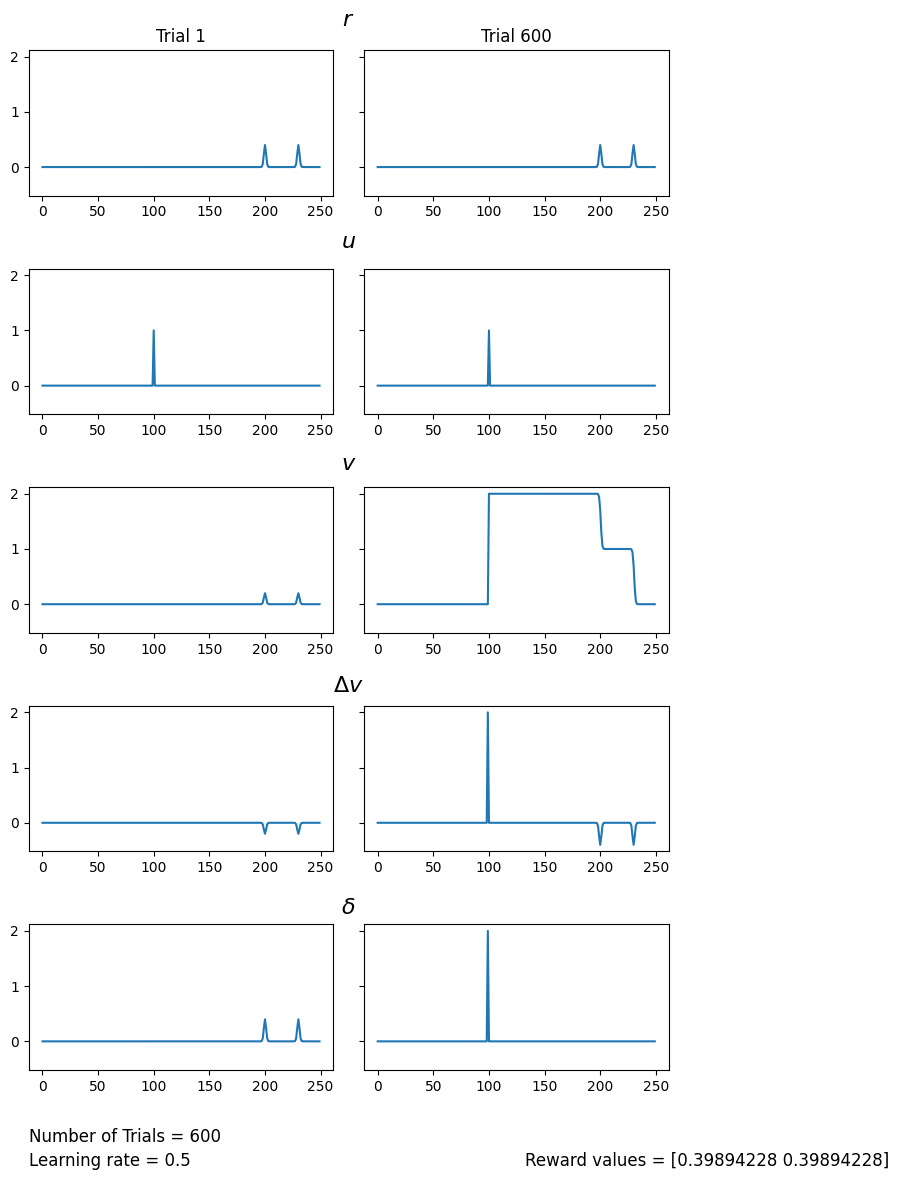

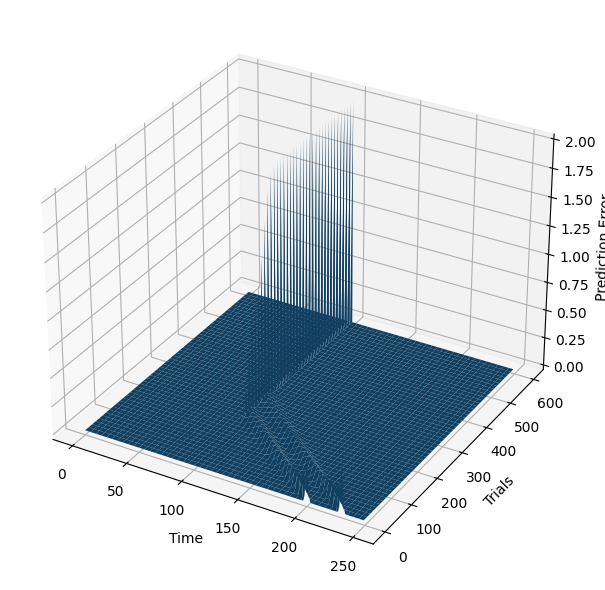

In [4]:
#Multiple rewards

reward_time = [200, 230]


t_p = plot(trials = trials)


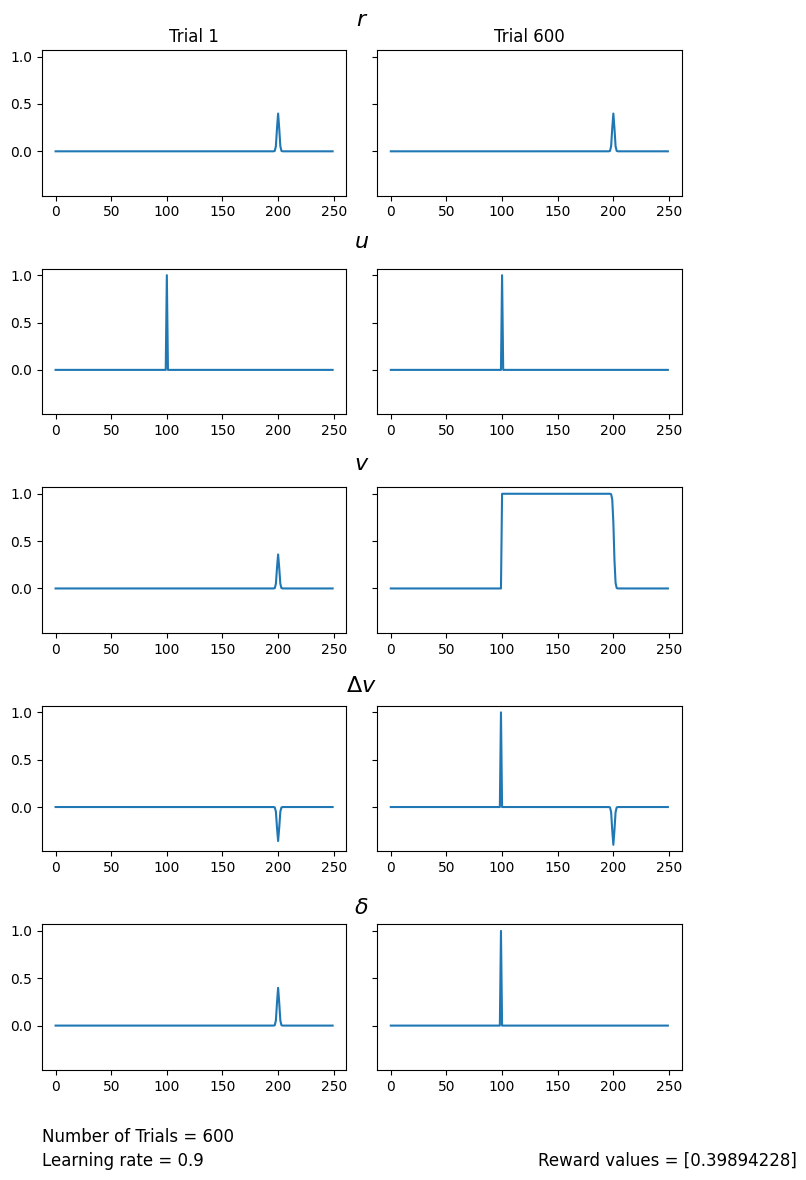

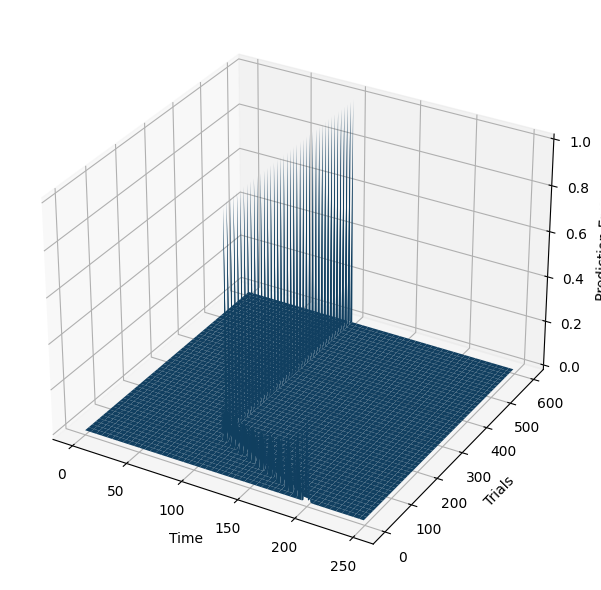

In [5]:
# change learning rate

reward_time = [200]
learning_rate = 0.9


t_p = plot(trials = trials)